## Counting grains and bubbles

This Scanning Element Microscopy image shows a glass sample
(light gray matrix) with some bubbles (black) and unmolten
sand grains (dark gray). We wish to determine the fraction
of the sample covered by these three phases,
and to estimate the number of sand grains and bubbles,
their average sizes, etc.

### Loading the slide

In [36]:
%matplotlib inline
import numpy as np

import matplotlib
matplotlib.rcParams['image.interpolation'] = 'nearest'
matplotlib.rcParams['image.cmap'] = 'viridis'
matplotlib.rcParams['figure.figsize'] = (10, 7)

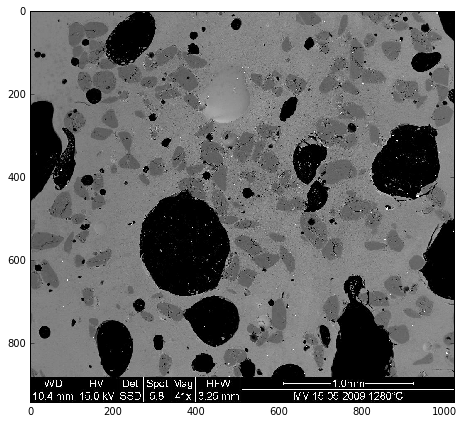

In [37]:
from skimage import io
from matplotlib import pyplot as plt

img = io.imread('../images/bubbles.jpg')

plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest');

### Remove banner

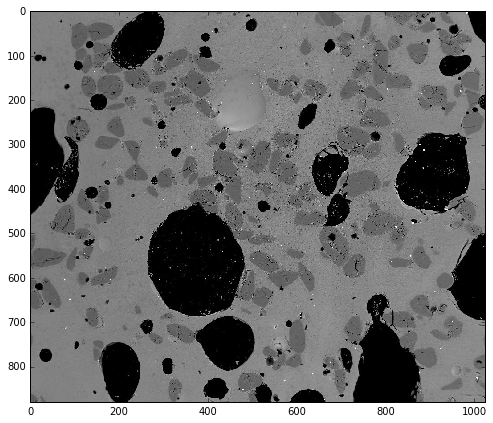

In [38]:
img_clean = img[:880, :]
plt.imshow(img_clean, cmap=plt.cm.gray, interpolation='nearest');

### Filter to get rid of speckles

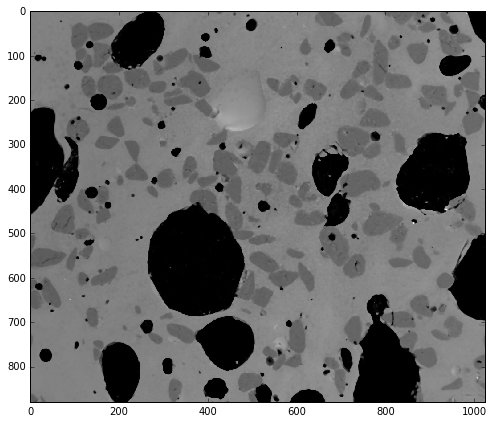

In [39]:
import scipy.ndimage as ndi
img_med = ndi.median_filter(img_clean, size=5)
plt.imshow(img_med, cmap=plt.cm.gray, interpolation='nearest');

### Find threshold values

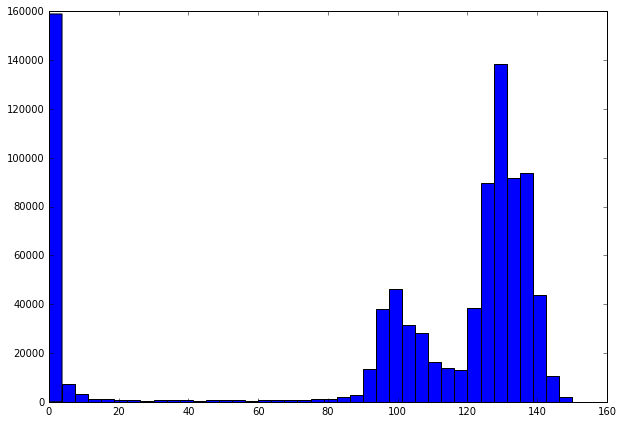

In [40]:
plt.hist(img_med.flatten(), bins=40, range=(0, 150));

### Separate layers by thresholding

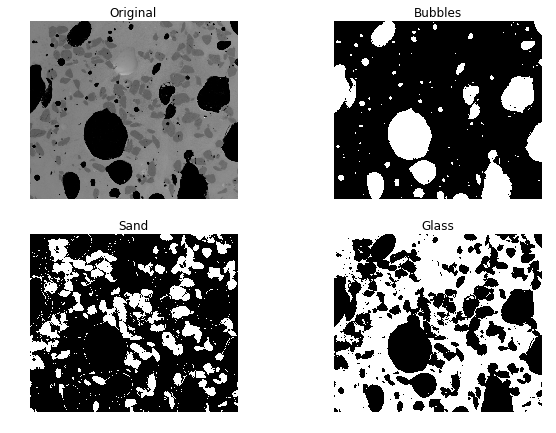

In [41]:
bubbles = (img_med <= 50)
sand = (img_med > 50) & (img_med <= 120)
glass = (img_med > 120)

def plot_images(cmap=plt.cm.gray):
    for n, (name, image) in \
        enumerate([('Original', img_med),
                   ('Bubbles', bubbles),
                   ('Sand', sand),
                   ('Glass', glass)]):
    
        plt.subplot(2, 2, n + 1)
        plt.imshow(image, cmap=cmap)
        plt.title(name)
        plt.axis('off')
        
plot_images();

### Visualise layers

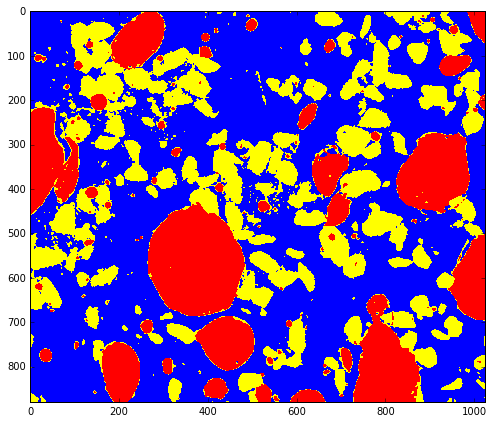

In [42]:
def plot_color_overlay():
    all_layers = np.zeros((img_clean.shape[0],
                           img_clean.shape[1], 3)) # Color image

    # You shouldn't run this if bubbles isn't a mask
    # -- otherwise, fancy indexing instead of masking
    assert(bubbles.dtype == np.bool)
    
    all_layers[bubbles] = (1, 0, 0)
    all_layers[sand] = (1, 1, 0)
    all_layers[glass] = (0, 0, 1)

    plt.imshow(all_layers)

plot_color_overlay()

### Clean up shapes found

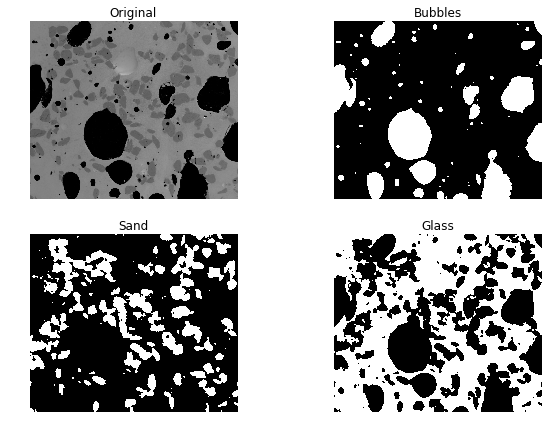

In [43]:
for img in (sand, bubbles, glass):
    img[:] = ndi.binary_opening(img, np.ones((5, 5)))
    img[:] = ndi.binary_closing(img, np.ones((5, 5)))
    
plot_images()

### Label connected components

115 regions found in Sand
Mean obj area 1769
70 regions found in Bubbles
Mean obj area 2516
27 regions found in Glass
Mean obj area 19111


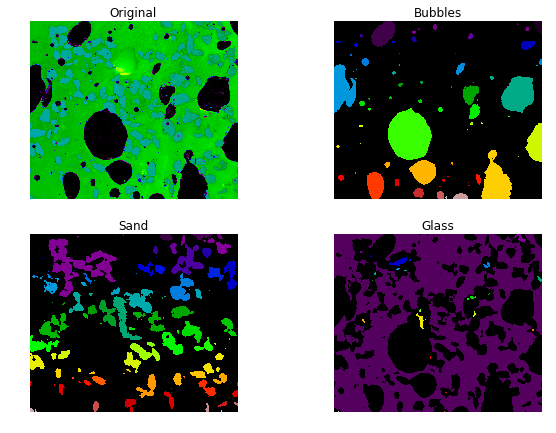

In [44]:
# Convert to int so we can store the labels
bubbles = bubbles.astype(int)
sand = sand.astype(int)
glass = glass.astype(int)

for name, img in [('Sand', sand),
                  ('Bubbles', bubbles),
                  ('Glass', glass)]:
    labels, count = ndi.label(img)
    print('%s regions found in %s' % (count, name))
    img[:] = labels
    
    obj_areas = [np.sum(labels == i) for \
                 i in range(1, labels.max())]
    print("Mean obj area %d" % np.mean(obj_areas))

plot_images(cmap=plt.cm.spectral)